# ANN (Artificial Neural Network; 신경망) -base for Deep Learning
### by 우현우 Hyunwoo Woo (Hub1)
#### Dept. of Industrial Engineering, Yonsei Univ  (Industrial Statistics Lab; ISL 산업통계연구실)
#### hw.woo@yonsei.ac.kr   (010 8966 5705)
#### blog: https://hub1.tistory.com
#### github repository: https://github.com/HyunwooWoo

##### ----------------------------------------------------------------------------------

# - Tensorflow 설치

#### : Anaconda Navigator에서 새로운 채널(가상환경)을 만든 뒤, Environments 탭 > Create 버튼 > 가상 환경의 이름과 파이썬 버전을 지정 > Open Terminal > pip install tensorflow 입력해서 설치
#### 참고링크: https://gracefulprograming.tistory.com/124      https://blog.naver.com/ndb796/221277853081

####  (또는)

#### : Anaconda Prompt (Anaconda3) > 관리자 권한 실행 > conda install tensorflow 입력해서 설치 (또는 pip install tensorflow)
#### 참고 링크: https://chancoding.tistory.com/5

### 설치 완료후 tensor flow가 정상적으로 동작하는지 확인하는 코드 (아래 코드의 모델과 결과가 나오면 ok)

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4673 - accuracy: 0.8653
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1500 - accuracy: 0.9557: 0s - loss: 0.1506 - accuracy: 0. - ETA: 0s - loss: 0.1503 - accuracy: 
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1091 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0879 - accuracy: 0.9732
Epoch 5/5
313/313 [==============================] - 0s 806us/step - loss: 0.0713 - accuracy: 0.9779


[0.07128121703863144, 0.9779000282287598]

In [2]:
tf.__version__

'2.4.1'

# Regression

In [3]:
import pandas as pd
dataset = pd.read_csv('kc_house_data.csv')
dataset
# https://www.kaggle.com/harlfoxem/housesalesprediction
# This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
# information link: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


date;Date sold

price;Sale price

bedrooms;Number of bedrooms

bathrooms;Number of bathrooms

sqft_liv;Size of living area in square feet

sqft_lot;Size of the lot in square feet

floors;Number of floors

waterfront;‘1’ if the property has a waterfront, ‘0’ if not.

view;An index from 0 to 4 of how good the view of the property was

condition;Condition of the house, ranked from 1 to 5

grade;Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. Additional information in: KingCounty

sqft_above;Square feet above ground

sqft_basmt;Square feet below ground

yr_built;Year built

yr_renov;Year renovated. ‘0’ if never renovated

zipcode;5 digit zip code

lat;Latitude

long;Longitude

squft_liv15;Average size of interior housing living space for the closest 15 houses, in square feet

squft_lot15;Average size of land lots for the closest 15 houses, in square feet

In [4]:
dataset.shape

(21613, 21)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
dataset.isnull().sum() #결측치확인

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
dataset_new = dataset.copy().loc[:,['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_living15', 'sqft_lot15', 
                                    'price']] # 일부만 선택

In [8]:
dataset_new

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_living15,sqft_lot15,price
0,3,1.00,1180,1.0,1180,1340,5650,221900.0
1,3,2.25,2570,2.0,2170,1690,7639,538000.0
2,2,1.00,770,1.0,770,2720,8062,180000.0
3,4,3.00,1960,1.0,1050,1360,5000,604000.0
4,3,2.00,1680,1.0,1680,1800,7503,510000.0
...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,1530,1530,1509,360000.0
21609,4,2.50,2310,2.0,2310,1830,7200,400000.0
21610,2,0.75,1020,2.0,1020,1020,2007,402101.0
21611,3,2.50,1600,2.0,1600,1410,1287,400000.0


In [9]:
# Features와 target 나누기
features = dataset_new[dataset_new.columns[:-1]]
target = dataset_new[dataset_new.columns[-1]]

In [10]:
# train: test = 8:2 분리
from sklearn.model_selection import train_test_split
train_features, test_features , train_target, test_target = train_test_split(
    features, target, test_size = 0.2, random_state = 2021)

In [11]:
print(train_features.shape)
print(train_target.shape)
print(test_features.shape)
print(test_target.shape)

(17290, 7)
(17290,)
(4323, 7)
(4323,)


In [12]:
print(type(train_features))
print(type(train_target))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [13]:
import pandas as pd
pd.DataFrame(train_features.copy())

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_living15,sqft_lot15
13183,4,2.00,1700,1.0,850,1540,13260
13380,3,1.75,1830,1.0,930,1320,3200
10540,2,1.00,860,1.0,860,1100,6860
13619,4,2.50,2010,2.0,2010,1870,4394
17788,4,2.50,1940,2.0,1940,1900,3864
...,...,...,...,...,...,...,...
16347,3,1.75,1500,1.0,1060,1740,6180
20318,4,2.50,2190,2.0,2190,2190,3600
2669,3,1.00,1220,1.0,1220,1420,13137
17536,3,1.75,1230,1.0,1230,1550,12000


In [14]:
pd.DataFrame(train_target.copy())

,price
13183,161000.0
13380,348000.0
10540,245000.0
13619,427500.0
17788,390000.0
...,...
16347,440000.0
20318,540000.0
2669,161500.0
17536,179900.0


In [15]:
# Z-score Standardization

mean = train_features.mean(axis=0)
train_features -= mean
std = train_features.std(axis=0)
train_features /= std

In [16]:
# test data (Features)도 train의 기준으로 표준화
test_features -= mean
test_features /= std

In [17]:
# Network 구조 형성
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

# tf.set_random_seed(2021) <- 이건 tensorflow 1 version
tf.random.set_seed(2021)



# 1 #
model = models.Sequential() # ANN 형성

# layers.Dense(node수, activation function, 기타 설정)
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
## activation에는 'relu', 'linear', 'sigmoid', 'softmax' 등

model.add(layers.Dense(16, activation = 'relu', input_shape=(train_features.shape[1],))) # Hidden layer
# (input layer를 따로 만들 필요 없음. 첫번째 hidden layer에서 input layer 옵션도 설정하는 것임)

model.add(layers.Dense(8, activation = 'relu')) # Hidden layer
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개



# 2 #
# loss function과 optimizer 설정

adam = tf.keras.optimizers.Adam(learning_rate=0.1)
# Optimizer 종류 => https://keras.io/api/optimizers/
# SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
## Adam을 가장 자주 씀


# 3 #
model.compile(optimizer=adam, loss='mse', metrics=['mape'])
# loss 종류 => https://keras.io/api/losses/
## loss는 train(훈련)에서 weight를 update하는 용도, metrics은 validation을 통한 성능 평가용
# metrics 종류 => https://keras.io/api/metrics/regression_metrics/#meanabsolutepercentageerror-class
## mse, mape(mean absolute percentage error) : 이 2가지를 자주 씀

# 다음과 같이도 이용 가능
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])



# 콜백 함수 #
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # learning rate 관련
## 콜백함수 참고 링크
# https://deep-deep-deep.tistory.com/1
# https://deep-deep-deep.tistory.com/55
# https://deep-deep-deep.tistory.com/56
# https://deep-deep-deep.tistory.com/53

# 4 #
# model.fit(train_data, train_targets, epochs=80, batch_size=16)
reg_history = model.fit(train_features, train_target, epochs=300, batch_size=1024, validation_split=0.2,
                       callbacks=[es,lr])

# epochs: 전체 data를 몇번 활용
# batch_size: Total number of training examples present in a single batch

# 추가설명: https://losskatsu.github.io/machine-learning/epoch-batch/#2-batch-size%EC%9D%98-%EC%9D%98%EB%AF%B8
# 추가설명: http://blog.naver.com/PostView.nhn?blogId=qbxlvnf11&logNo=221449297033&parentCategoryNo=&categoryNo=52&viewDate=&isShowPopularPosts=false&from=postView

## 전체 2000 개의 데이터가 있고, epochs = 20, batch_size = 500이라고 가정합시다.
#그렇다면 1 epoch는 각 데이터의 size가 500인 batch가 들어간 네 번의 iteration으로 나누어집니다.
#그리고 전체 데이터셋에 대해서는 20 번의 학습이 이루어졌으며, iteration 기준으로 보자면 총 80 번의 학습이 이루어진 것입니다.


Epoch 1/300
14/14 [==============================] - 2s 112ms/step - loss: 440655227562.6667 - mape: 99.9914 - val_loss: 412681371648.0000 - val_mape: 99.8826
Epoch 2/300
14/14 [==============================] - 0s 5ms/step - loss: 441322753228.8000 - mape: 99.7261 - val_loss: 406399090688.0000 - val_mape: 98.8277
Epoch 3/300
14/14 [==============================] - 0s 5ms/step - loss: 415034135893.3333 - mape: 98.1030 - val_loss: 383530270720.0000 - val_mape: 94.8224
Epoch 4/300
14/14 [==============================] - 0s 5ms/step - loss: 382888651434.6667 - mape: 92.7725 - val_loss: 329393864704.0000 - val_mape: 84.5910
Epoch 5/300
14/14 [==============================] - 0s 4ms/step - loss: 308011661175.4667 - mape: 80.1683 - val_loss: 239411478528.0000 - val_mape: 66.0805
Epoch 6/300
14/14 [==============================] - 0s 4ms/step - loss: 216849144217.6000 - mape: 60.4643 - val_loss: 144177872896.0000 - val_mape: 48.6200
Epoch 7/300
14/14 [==============================] - 0s 

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


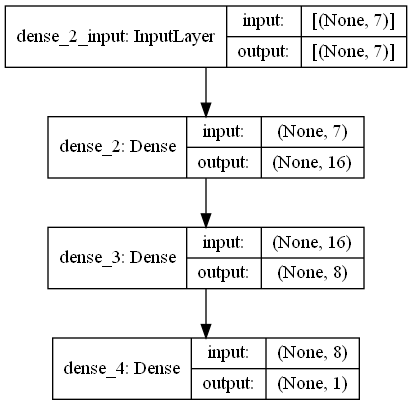

In [19]:
from tensorflow.keras.utils import plot_model

#plot_model(model, to_file='model.png')
plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

# 오류 발생시 아래를 모두 진행
# (1) Jupyter에서 아래 2개 설치
# pip install pydot
# pip install graphviz

# (2) Anaconda navigator > Environments > 내 가상환경(channel) 우측 재생버튼 ▶ 클릭 > Open Terminal 클릭
# 이후, 아래의 2개를 각각 순서대로 입력 후 엔터 쳐서 설치
## conda install pydot
## conda install graphviz

# 참고 링크: https://twinstarinfo.blogspot.com/2019/05/pydot-install.html

In [20]:
model.get_weights()
#순서대로, (input layer -> hidden layer1 -> hidden layer2 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[-3.72907609e-01, -7.73600340e-01, -7.40830183e+00,
         -3.46868306e-01,  5.15410328e+00, -6.63862181e+00,
         -7.67465889e-01,  1.04001827e+01, -3.84614527e-01,
         -7.57913399e+00, -1.71733594e+00, -9.65200615e+00,
         -1.75314026e+01,  6.38884497e+00, -6.66218758e+00,
         -2.79927492e+00],
        [-3.04552794e-01, -9.26651359e-01,  4.93891525e+00,
          6.54766321e-01, -1.22760260e+00,  8.12296677e+00,
         -5.42189538e-01, -8.52932072e+00,  9.20188606e-01,
          5.72828817e+00,  7.44147524e-02,  6.11483669e+00,
          8.84659863e+00, -5.55000019e+00, -2.81679239e-02,
         -2.28267908e+00],
        [-6.61315799e-01,  2.14943905e+01,  2.69934349e+01,
         -4.15738249e+00, -2.59589100e+01,  4.17892075e+01,
          2.09776325e+01, -8.07302666e+00, -4.30686903e+00,
          2.64865322e+01,  2.07502003e+01,  2.16120319e+01,
          2.32044487e+01, -1.19419861e+01,  2.19587612e+01,
          2.19506130e+01],
        [-3.7215561

In [21]:
pd.DataFrame(model.get_weights()[0])
# []안에 숫자를 바꿔가면서 차례로 weight와 bias를 볼 수 있음
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.372908,-0.773600,-7.408302,-0.346868,5.154103,-6.638622,-0.767466,10.400183,-0.384615,-7.579134,-1.717336,-9.652006,-17.531403,6.388845,-6.662188,-2.799275
1,-0.304553,-0.926651,4.938915,0.654766,-1.227603,8.122967,-0.542190,-8.529321,0.920189,5.728288,0.074415,6.114837,8.846599,-5.550000,-0.028168,-2.282679
2,-0.661316,21.494390,26.993435,-4.157382,-25.958910,41.789207,20.977633,-8.073027,-4.306869,26.486532,20.750200,21.612032,23.204449,-11.941986,21.958761,21.950613
3,-3.721556,-5.919954,5.453341,-4.291659,-11.311871,8.302159,-5.140869,30.231371,-4.831429,2.889483,-2.878313,-6.732401,-31.462202,15.029830,-2.716159,3.769760
4,-20.442667,1.308420,2.039448,-19.399145,0.727355,-7.402297,2.917070,-12.900872,-17.618202,2.448430,7.027152,5.936754,5.573349,-15.696167,5.470545,3.333612
5,18.629763,4.718888,14.767061,19.248569,12.887674,-24.629765,4.829851,-6.936310,17.418621,15.341691,1.799524,-1.214761,13.621016,8.493811,1.187606,10.432775
6,-9.292506,-38.273079,7.110518,-3.300250,2.440373,-51.537476,-29.042452,1.360186,-2.889453,8.267411,-3.054495,-2.845180,0.198521,1.304229,-1.977279,1.462423


In [22]:
reg_history_dict = reg_history.history
reg_history_dict.keys()

# reg_history.history['loss'] 처럼 값을 뽑아낼 수도 있다.

dict_keys(['loss', 'mape', 'val_loss', 'val_mape', 'lr'])

In [23]:
reg_history.history

{'loss': [430558674944.0,
  427877826560.0,
  414610194432.0,
  376696766464.0,
  301660635136.0,
  200317878272.0,
  125674061824.0,
  108142034944.0,
  101492457472.0,
  95433662464.0,
  90111524864.0,
  85256241152.0,
  80749084672.0,
  76709421056.0,
  73234964480.0,
  70529507328.0,
  68782612480.0,
  67587297280.0,
  66687307776.0,
  65974292480.0,
  65328812032.0,
  64775008256.0,
  64284581888.0,
  63836864512.0,
  63429324800.0,
  63087570944.0,
  62726615040.0,
  62408351744.0,
  62108811264.0,
  61919993856.0,
  61626507264.0,
  61400342528.0,
  61229207552.0,
  61015089152.0,
  60850147328.0,
  60814000128.0,
  60607303680.0,
  60389474304.0,
  60184932352.0,
  60087287808.0,
  59935625216.0,
  59811692544.0,
  59669962752.0,
  59598430208.0,
  59432140800.0,
  59334520832.0,
  59213021184.0,
  59085148160.0,
  59020898304.0,
  58971910144.0,
  58751111168.0,
  58740469760.0,
  58602778624.0,
  58641575936.0,
  58556383232.0,
  58390376448.0,
  58338017280.0,
  58216128512.

In [24]:
reg_history.history['lr']

[0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1]

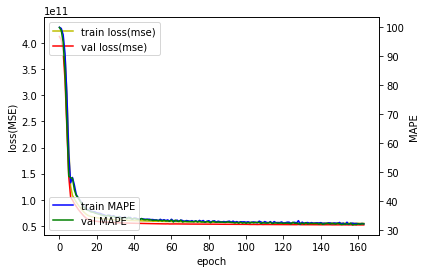

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

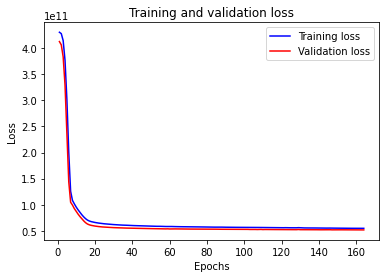

In [27]:
# 따로 표현하기 1
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

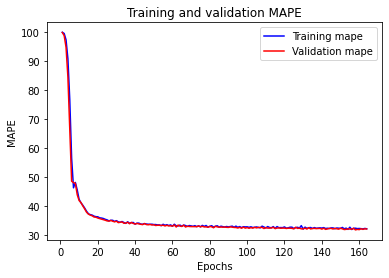

In [28]:
# 따로 표현하기 2
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [29]:
# 예측
y_pred = model.predict(test_features)

In [30]:
y_pred.shape

(4323, 1)

In [31]:
y_pred

array([[ 370112.6 ],
       [1011917.06],
       [ 433898.4 ],
       ...,
       [ 395005.97],
       [1309950.5 ],
       [ 992236.6 ]], dtype=float32)

In [32]:
test_target.shape

(4323,)

In [33]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))
# 참고: https://scikit-learn.org/stable/modules/classes.html?highlight=sklearn%20metrics#module-sklearn.metrics

test R squared: 0.582
test MSE: 56881472279.863
tset MAPE: 0.323


# Classification

In [45]:
import tensorflow as tf
from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [46]:
print(type(train_images))
print(type(test_images))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [47]:
print(train_images.ndim)
print(test_images.ndim)
# 3차원 arrayy라는 뜻

3
3


In [48]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


train: 60000개의 이미지가 있고,
한 이미지가 28x28개의pixels로 구성되어 있다.

test: 10000개의 이미지가 있고,
한 이미지가 28x28개의 pixels로 구성되어 있다.

(각 픽셀은 0~255 중 한 숫자를 가지는데, 255에 가까울수록 흰색을 의미)

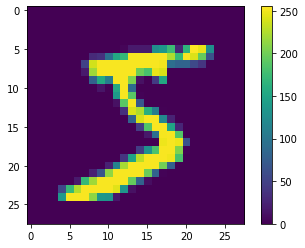

In [49]:
# 어떤 이미지인지 확인
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

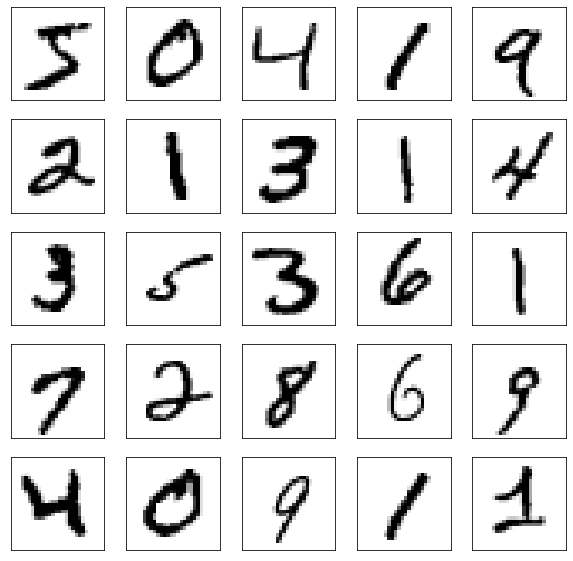

In [50]:
# 일부 숫자들 확인
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [51]:
# input data의 형태를 3D array에서 2D array (즉, matrix) 형태로 변경
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [52]:
# Input scaling
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [53]:
# One-hot Encoding
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# 원래의 종속변수를 담고 있는 array는 벡터, 즉 각 원소가 한개 이미지의 종속변수 값 (0 ~ 9) 을 취함

In [54]:
# test 데이터에 있는 첫번째 이미지의 종속변수 값은 7
# 이를 one-hot vector로 변경

print(test_labels_one_hot.shape)

print(test_labels[0])
print(test_labels_one_hot[0]) # one-hot vector (7번째 값만이 1)

(10000, 10)
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [55]:
from tensorflow.keras import models
from tensorflow.keras import layers

# tf.set_random_seed(2021) <- 이건 tensorflow 1 version
tf.random.set_seed(2021)

# 1 #
network = models.Sequential() # neural network의 layer를 담을 수 있는 틀을 생성


# 2 #
network.add(layers.Dense(32, activation = 'relu', input_shape=(28*28,))) # Hidden layer & Input layer
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
# Hiddenlayer 생성
# 32, 8개의 노드로 구성
# relu를 활성화 함수로 사용
# 28x28개의 input을 받음

network.add(layers.Dense(10, activation = 'softmax'))
# Output layer 생성
# 10개의 노드로 구성 ( = 종속변수가 취할 수 있는 값의 갯수)

## activation에는 'relu', 'linear', 'sigmoid', 'softmax' 등
# 다항분류이므로 softmax 활성화함수 사용
# 이진분류인 경우 sigmoid 사용



# 3 #
from tensorflow.keras import optimizers

network.compile(optimizer=optimizers.RMSprop(lr=0.01),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# weight값을 업데이트하는데 사용되는 방법, 여기서는 RMSprop 방법 사용
# 비용함수(loss)는 categorical_crossentropy 사용
# 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용

# Optimizer 종류 => https://keras.io/api/optimizers/
# SGD, RMSprop Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl



# 콜백함수 #
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

## 콜백함수 참고 링크
# https://deep-deep-deep.tistory.com/1
# https://deep-deep-deep.tistory.com/55
# https://deep-deep-deep.tistory.com/56
# https://deep-deep-deep.tistory.com/53



# 4 #
cls_history = network.fit(train_images, train_labels_one_hot, epochs=300, batch_size=1024, validation_split=0.2,
                         callbacks=[es, lr])

Epoch 1/300
47/47 [==============================] - 1s 9ms/step - loss: 1.9847 - accuracy: 0.2794 - val_loss: 0.4761 - val_accuracy: 0.8752
Epoch 2/300
47/47 [==============================] - 0s 7ms/step - loss: 0.5002 - accuracy: 0.8552 - val_loss: 0.3219 - val_accuracy: 0.9083
Epoch 3/300
47/47 [==============================] - 0s 6ms/step - loss: 0.3256 - accuracy: 0.9080 - val_loss: 0.3227 - val_accuracy: 0.9032
Epoch 4/300
47/47 [==============================] - 0s 6ms/step - loss: 0.2654 - accuracy: 0.9210 - val_loss: 0.2120 - val_accuracy: 0.9402
Epoch 5/300
47/47 [==============================] - 0s 6ms/step - loss: 0.2302 - accuracy: 0.9327 - val_loss: 0.2169 - val_accuracy: 0.9380
Epoch 6/300
47/47 [==============================] - 0s 6ms/step - loss: 0.1942 - accuracy: 0.9436 - val_loss: 0.1883 - val_accuracy: 0.9491
Epoch 7/300
47/47 [==============================] - 0s 6ms/step - loss: 0.1774 - accuracy: 0.9475 - val_loss: 0.2221 - val_accuracy: 0.9336
Epoch 8/300
4

In [56]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                90        
Total params: 25,474
Trainable params: 25,474
Non-trainable params: 0
_________________________________________________________________


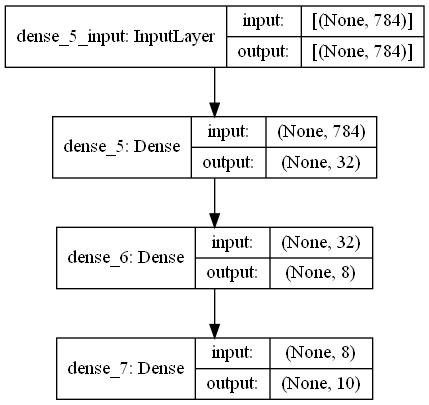

In [57]:
from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='model.png')
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)

In [58]:
network.get_weights()
#순서대로, (input layer -> hidden layer1 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[ 0.01255281, -0.03958989, -0.02309429, ..., -0.04072332,
          0.06385765, -0.01381921],
        [ 0.00214591,  0.03357299,  0.06083503, ...,  0.01501311,
          0.06368599,  0.07188702],
        [-0.01924979,  0.02048904,  0.04070166, ..., -0.04734326,
          0.07094867, -0.03604262],
        ...,
        [-0.05643506,  0.03958071,  0.06687572, ...,  0.0001424 ,
         -0.05151775,  0.05889157],
        [-0.05447666, -0.08264917, -0.03220022, ..., -0.0770645 ,
         -0.00509472, -0.01218699],
        [ 0.04489527,  0.08318741,  0.03264646, ..., -0.00155666,
         -0.06556559, -0.04434505]], dtype=float32),
 array([-0.08436055, -0.03162254,  0.34628358,  0.419131  , -0.13659698,
        -0.09467942,  0.18722555, -0.0316167 , -0.29548806,  0.40920419,
        -0.09136711, -0.18685736, -0.03280419,  0.15315014, -0.03162143,
         0.42148593,  0.2070174 , -0.0356604 ,  0.02623221, -0.03162229,
         0.23844306, -0.12036575, -0.17913108,  0.10015673, -0.062

In [59]:
pd.DataFrame(network.get_weights()[0]) # input -> hidden의 weights

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.012553,-0.039590,-0.023094,-0.011284,0.020911,-0.021276,0.030984,0.081252,-0.041336,-0.028756,...,0.083769,-0.028327,0.069921,-0.034418,-0.001660,0.016817,0.017408,-0.040723,0.063858,-0.013819
1,0.002146,0.033573,0.060835,-0.072945,0.019659,0.029949,-0.084746,0.029649,0.020775,0.012430,...,0.045728,0.019126,-0.071481,0.029716,0.075084,-0.012095,-0.083233,0.015013,0.063686,0.071887
2,-0.019250,0.020489,0.040702,-0.000689,-0.068028,-0.072953,0.068786,-0.064957,-0.038435,0.046285,...,-0.064958,-0.023173,-0.081749,0.011494,0.070404,0.082755,0.024953,-0.047343,0.070949,-0.036043
3,-0.050085,-0.073793,0.051704,-0.073050,0.022443,-0.024670,-0.069371,-0.002280,0.068739,0.077638,...,0.041915,-0.070094,-0.068959,-0.004804,0.082888,0.007120,-0.081418,0.068177,-0.068706,-0.077910
4,-0.071834,-0.037642,0.079724,-0.075287,-0.069439,0.004077,-0.053881,-0.063413,-0.082871,-0.076708,...,-0.081452,0.069481,0.061309,-0.069432,-0.084707,-0.057423,-0.013900,0.078455,-0.063130,0.031926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,-0.009687,0.019623,-0.249398,0.117811,0.332397,0.092103,-0.020525,0.025246,-0.016591,0.024156,...,-0.170585,0.122586,-0.155162,-0.007824,-0.036869,0.817755,0.050395,-0.799553,0.168264,0.029459
780,0.046558,-0.008792,-0.000222,0.021376,0.036432,0.012680,0.002019,-0.046524,-0.076038,-0.018219,...,0.038165,-0.039340,-0.067869,0.013521,-0.074348,-0.068011,0.064885,-0.003408,0.069087,0.005872
781,-0.056435,0.039581,0.066876,0.077317,0.066437,-0.038827,0.039527,0.074057,0.009214,-0.081482,...,0.013389,-0.085104,-0.057690,-0.000980,-0.024504,0.045100,0.031079,0.000142,-0.051518,0.058892
782,-0.054477,-0.082649,-0.032200,-0.079429,0.037634,-0.028775,-0.012823,-0.019655,-0.040172,-0.019911,...,0.046158,-0.058819,0.025890,-0.020542,0.080961,-0.076993,0.023265,-0.077064,-0.005095,-0.012187


In [60]:
pd.DataFrame(network.get_weights()[1]) # input -> hidden의 bias

,0
0,-0.084361
1,-0.031623
2,0.346284
3,0.419131
4,-0.136597
5,-0.094679
6,0.187226
7,-0.031617
8,-0.295488
9,0.409204


In [61]:
pd.DataFrame(network.get_weights()[2]) # hidden -> hidden의 weights

,0,1,2,3,4,5,6,7
0,0.261605,0.465547,-0.238973,0.781171,-0.109330,-1.105007,-0.268807,-0.533526
1,-0.102578,0.349167,0.296233,0.230521,0.193475,0.255682,0.239427,-0.026813
2,0.649692,-0.421498,-0.117041,0.536671,-0.908008,-0.021070,0.047126,-0.267905
3,0.440462,-0.132709,0.702586,0.012996,0.079708,0.383189,0.473290,-0.201522
4,0.027637,0.526495,-0.086429,0.723231,0.285566,-0.777758,-0.198139,-0.199710
5,0.162947,0.015545,-0.601391,-0.099912,-1.048735,0.007959,1.026409,-0.482209
6,-0.200267,-0.388349,0.657777,0.104848,-0.969781,-0.043182,-0.400567,0.073995
7,-0.305145,0.100566,-0.180554,-0.081394,-0.044216,-0.221830,-0.118561,-0.200375
8,-0.159552,0.615506,0.216155,-0.673451,-0.693385,0.468273,-0.022368,-0.442195
9,-0.027418,-0.031385,-0.085787,0.331991,-0.102220,0.340989,0.012059,0.738948


In [62]:
pd.DataFrame(network.get_weights()[3]) # hidden -> hidden의 bias

,0
0,0.002812
1,-0.147717
2,0.354442
3,0.010875
4,0.313123
5,0.295049
6,0.272445
7,0.431785


In [63]:
cls_history_dict = cls_history.history
cls_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [64]:
cls_history.history

{'loss': [1.4651426076889038,
  0.46182140707969666,
  0.31675660610198975,
  0.25526097416877747,
  0.22246742248535156,
  0.19447894394397736,
  0.18058040738105774,
  0.16478240489959717,
  0.1534639447927475,
  0.14450012147426605,
  0.13697567582130432,
  0.12717492878437042,
  0.12282261252403259,
  0.1138954684138298,
  0.1107502430677414,
  0.10704351961612701,
  0.10266784578561783,
  0.09993084520101547,
  0.0969555452466011,
  0.09366282820701599,
  0.08937142789363861,
  0.08835442364215851,
  0.0822255089879036,
  0.08170242607593536,
  0.07994117587804794,
  0.07817532122135162,
  0.07764061540365219,
  0.07247316837310791,
  0.07255396991968155],
 'accuracy': [0.4816666543483734,
  0.8663958311080933,
  0.9091041684150696,
  0.9256874918937683,
  0.9340624809265137,
  0.9426458477973938,
  0.9463124871253967,
  0.9509999752044678,
  0.9538958072662354,
  0.9567291736602783,
  0.958020806312561,
  0.9619374871253967,
  0.9629166722297668,
  0.9644583463668823,
  0.9653750

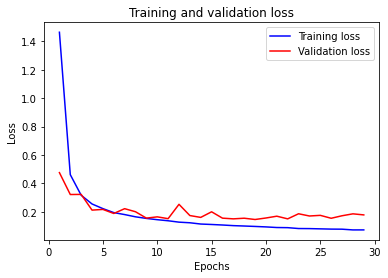

In [65]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

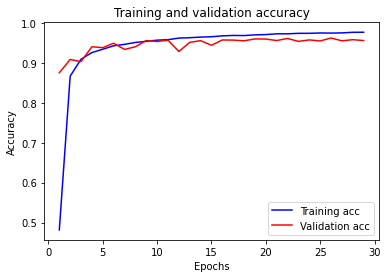

In [66]:
# 훈련과 검증 정확도
plt.clf() # 그래프를 초기화합니다.
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [67]:
pd.DataFrame(network.predict(test_images))

,0,1,2,3,4,5,6,7,8,9
0,7.156920e-10,1.390403e-06,4.147685e-06,1.466115e-06,3.906729e-06,1.309029e-05,5.734579e-10,9.999527e-01,2.266332e-05,6.638929e-07
1,7.099578e-07,2.910507e-06,9.997861e-01,1.487442e-05,5.136405e-09,2.026414e-16,1.306068e-11,2.934959e-07,1.952297e-04,1.507438e-11
2,3.243616e-09,9.989023e-01,5.326538e-07,2.290891e-05,9.940722e-06,1.816139e-07,4.846592e-06,1.134469e-04,8.388041e-04,1.070454e-04
3,9.996901e-01,3.674554e-13,1.412678e-05,4.430837e-07,1.345932e-06,1.065945e-06,5.902968e-06,1.415228e-06,9.243861e-08,2.854481e-04
4,2.592456e-04,1.347429e-08,8.270620e-06,6.125167e-06,9.966370e-01,3.606438e-07,2.828912e-07,8.251448e-05,1.649672e-06,3.004521e-03
...,...,...,...,...,...,...,...,...,...,...
9995,2.023628e-11,1.891506e-05,9.998673e-01,1.065253e-04,1.029233e-10,1.024017e-12,3.118733e-12,4.166594e-06,3.023913e-06,2.357950e-15
9996,7.209220e-12,4.647838e-07,1.590340e-10,9.999831e-01,7.192543e-09,1.190358e-05,7.390005e-14,6.659853e-15,2.745362e-07,4.318515e-06
9997,6.579635e-11,3.156320e-13,7.272934e-13,5.264451e-09,9.999554e-01,3.840331e-09,1.733185e-14,5.373982e-08,8.881877e-07,4.369672e-05
9998,6.933812e-16,5.774004e-15,6.378759e-18,6.373520e-06,4.075630e-14,9.999936e-01,1.778776e-14,7.356902e-19,1.757027e-07,9.843531e-12


In [68]:
test_loss, test_acc = network.evaluate(test_images, test_labels_one_hot)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

313/313 [==============================] - 0s 758us/step - loss: 0.1345 - accuracy: 0.9606
test loss: 0.134525865316391
test_accuracy: 0.9606000185012817


참고 (ANN):

https://onesixx.com/optimizer-loss-metrics/

https://keras.io/ko/metrics/

https://talkingaboutme.tistory.com/entry/DL-%ED%95%B4%EB%B3%B4%EB%A9%B4%EC%84%9C-%EB%B0%B0%EC%9A%B0%EB%8A%94-%EB%94%A5%EB%9F%AC%EB%8B%9D-ANN-%EA%B5%AC%ED%98%84-3

https://tykimos.github.io/2017/01/27/MLP_Layer_Talk/

https://han-py.tistory.com/207

https://jackyoon5737.tistory.com/32

https://gomguard.tistory.com/187

https://blog.naver.com/qbxlvnf11/221449297033

https://wikidocs.net/32105

http://blog.naver.com/shwotjd14/221458224334

https://bioinformaticsandme.tistory.com/241

https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/3-4-%EC%98%81%ED%99%94-%EB%A6%AC%EB%B7%B0-%EB%B6%84%EB%A5%98-%EC%9D%B4%EC%A7%84-%EB%B6%84%EB%A5%98-%EC%98%88%EC%A0%9C/

https://codetorial.net/tensorflow/get_output_of_neuron_layers.html

https://codetorial.net/tensorflow/visualize_model.html

https://codetorial.net/tensorflow/visualize_training_history.html




https://wikidocs.net/44766

https://gooopy.tistory.com/80

https://codetorial.net/tensorflow/classifying_the_cats_and_dogs.html

https://ssongnote.tistory.com/10

- RBF
https://www.python2.net/questions-379561.htm